# Neural Network

Trying to solve a prediction problem using sci-kit learn Neural network models. 


## Data Loading 

Everything was already processed so, just using that.

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:.2f}'.format

In [3]:
os.getcwd()
#os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')
X1=pd.read_csv(os.getcwd()+ '/X1.csv')
X2=pd.read_csv(os.getcwd()+ '/X2.csv')
from sklearn.utils import shuffle
X1 = shuffle(X1)
X2=shuffle(X2)
y_train=X1['Data_x'].reset_index(drop=True) # Separating all of the data
y_test=X2['Data_x'].reset_index(drop=True)
X_train1 = X1.iloc[:,3: ]
X_test1 = X2.iloc[:,3: ]

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()
scaler.fit(X_train1)
X_train=scaler.transform(X_train1)
X_test=scaler.transform(X_test1) 

## A first Pass
Just using the model as it comes. No parameter optimization here.

In [5]:
regr = MLPRegressor(max_iter=500).fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

0.9606744164003141

In [6]:
regr = MLPRegressor().fit(X_train, y_train)
y_pred=regr.predict(X_test)


In [7]:
y_true=y_test

In [8]:
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()

In [9]:
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head

<bound method NDFrame.head of        true  predicted  how_off
0   4092.40    1335.25    67.37
1   1142.20     574.00    49.75
2   3320.20    5070.45   -52.72
3   1343.20     361.44    73.09
4    616.50     348.42    43.48
5    623.90     472.10    24.33
6  20604.40   26314.74   -27.71
7   2868.40    2256.41    21.34
8   6167.80    9029.75   -46.40
9    958.10     601.94    37.17
10   323.70     408.24   -26.12
11  7339.60    4306.58    41.32
12   944.60     579.06    38.70
13  6289.80    9470.17   -50.56
14   959.20     776.65    19.03
15  1128.00     461.80    59.06
16  1651.80     965.77    41.53
17  3351.60    1311.18    60.88
18  7697.60    8378.16    -8.84
19  2145.80     587.42    72.62
20   861.60     666.76    22.61
21 15518.20   12381.99    20.21
22   469.90     593.87   -26.38
23  4741.60    2379.34    49.82
24  4037.50    1751.10    56.63
25   946.20     411.64    56.50
26   530.30     307.26    42.06
27  2307.40    1501.03    34.95
28  1787.50     920.67    48.49
29  4071.5

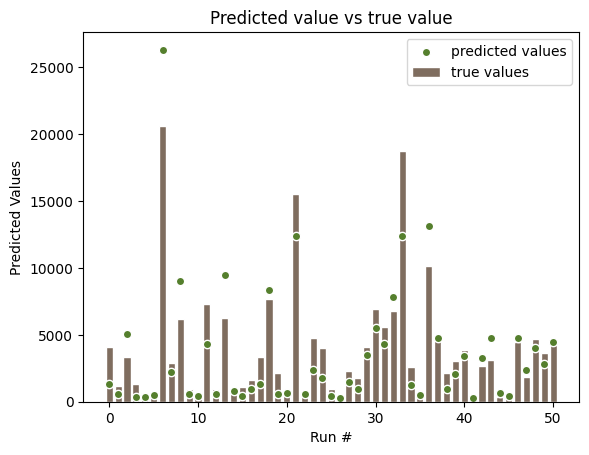

In [10]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

In [11]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 1220.8678777941018
Mean squared error 3265144.182676064
('Explained variance score', 0.828879006201036)
('R_2 score', 0.8214078463419598)


The model needed some optimization for sure. 


# Optimization


### Selecting activation function

Default activation is `relu` \
references*
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

Will try:\
`identity`-no-op activation, useful to implement linear bottleneck, returns f(x) = x\
`logistic`-The logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).\
`tahn`-the hyperbolic tan function, returns f(x) = tanh(x).

In [12]:
m=['relu','identity','logistic','tanh']
abc=[]
for i,j in (enumerate(m)):
    mod=j
    regr=MLPRegressor(activation=j).fit(X_train, y_train)
    regr.predict(X_test)
    y_pred=regr.predict(X_test)
    score=regr.score(X_test, y_test)
    abc.append([mod,score,mean_absolute_error(y_true, y_pred),mean_squared_error(y_true, y_pred),
                explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)])

In [13]:
scores=pd.DataFrame(abc,columns=['iter','score','MAE','MSE','EV','R2'])
scores

,iter,score,MAE,MSE,EV,R2
0,relu,0.80,1282.18,3639100.73,0.82,0.80
1,identity,0.81,1244.18,3435980.88,0.87,0.81
2,logistic,-0.73,3662.94,31681632.33,0.00,-0.73
3,tanh,-0.73,3654.12,31624987.06,0.00,-0.73


looks like identity is the winner here. 


## Changing iterations

In [14]:
m=2500
abc=[]
defg=[]
#This needs to run 3 times and in those 3 times. Needs to give results
for i in range(1,m,100):
    regr=MLPRegressor(activation='identity',max_iter=i).fit(X_train, y_train)
    regr.predict(X_test)
    y_pred=regr.predict(X_test)
    score=regr.score(X_test, y_test)
    abc.append([i,score,mean_absolute_error(y_true, y_pred)
                ,mean_squared_error(y_true, y_pred)
                ,explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)])

In [15]:
scores=pd.DataFrame(abc,columns=['iter','score','MAE','MSE','EV','R2'])

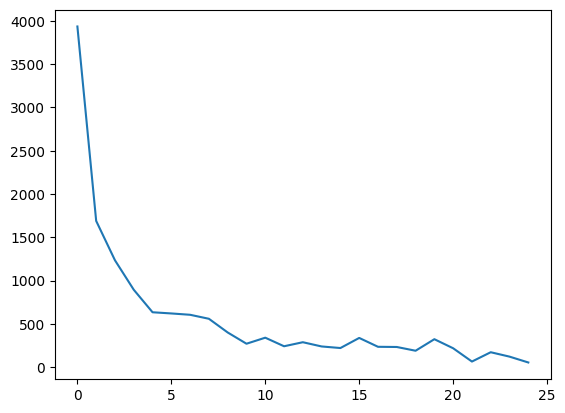

In [16]:
plt.plot(scores['MAE'])

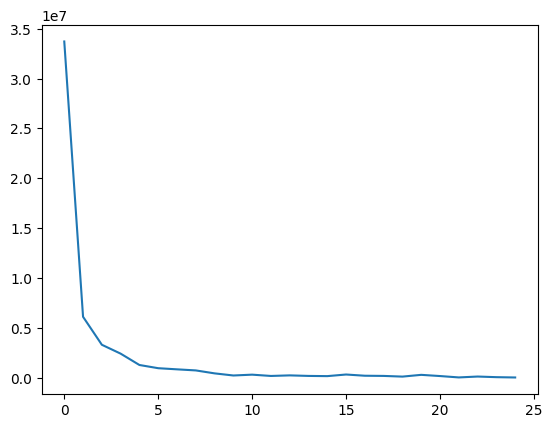

In [17]:
plt.plot(scores['MSE'])

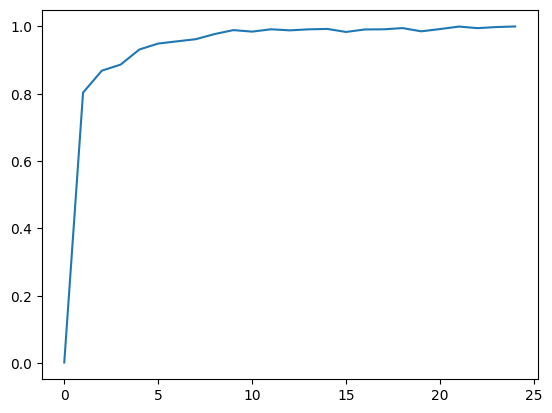

In [18]:
plt.plot(scores['EV'])

Best iterations is 2300

### Changing the solver

Going to change the solver now- the only alternative to adam is `lbfgs`

In [19]:
m=['lbfgs']
abc=[]
for i,j in (enumerate(m)):
    mod=j
    regr=MLPRegressor(activation='identity',max_iter=2300,solver=j).fit(X_train, y_train)
    regr.predict(X_test)
    y_pred=regr.predict(X_test)
    score=regr.score(X_test, y_test)
    abc.append([mod,score,mean_absolute_error(y_true, y_pred),mean_squared_error(y_true, y_pred),
                explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)])

In [20]:
scores=pd.DataFrame(abc,columns=['solver','score','MAE','MSE','EV','R2'])

In [21]:
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()

In [22]:
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head

<bound method NDFrame.head of        true  predicted  how_off
0   4092.40    4092.40     0.00
1   1142.20    1142.20    -0.00
2   3320.20    3320.30    -0.00
3   1343.20    1343.30    -0.01
4    616.50     616.50    -0.00
5    623.90     624.00    -0.02
6  20604.40   20604.42    -0.00
7   2868.40    2868.39     0.00
8   6167.80    6167.81    -0.00
9    958.10     958.10    -0.00
10   323.70     323.70    -0.00
11  7339.60    7339.60     0.00
12   944.60     944.70    -0.01
13  6289.80    6289.79     0.00
14   959.20     959.30    -0.01
15  1128.00    1128.00    -0.00
16  1651.80    1651.80    -0.00
17  3351.60    3351.70    -0.00
18  7697.60    7697.59     0.00
19  2145.80    2145.80     0.00
20   861.60     861.60     0.00
21 15518.20   15518.19     0.00
22   469.90     469.90    -0.00
23  4741.60    4741.60     0.00
24  4037.50    4037.40     0.00
25   946.20     946.30    -0.01
26   530.30     530.40    -0.02
27  2307.40    2307.30     0.00
28  1787.50    1787.50    -0.00
29  4071.5

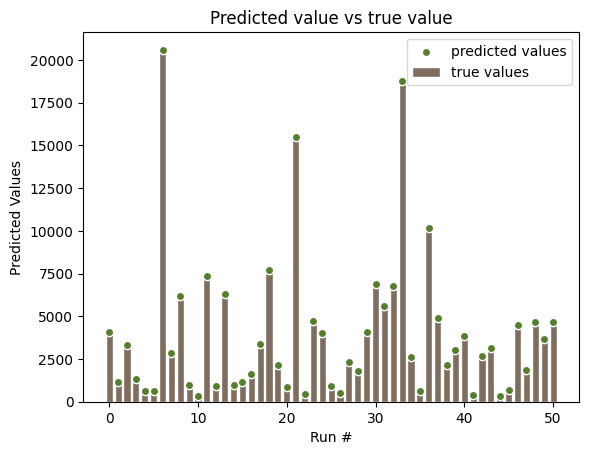

In [23]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

In [24]:
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_true, y_pred,multioutput='raw_values')

array([0.99998806])

In [25]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 0.032247834895177255
Mean squared error 0.003000201000565843
('Explained variance score', 0.9999999998455594)
('R_2 score', 0.9999999998358994)


# Results

The Neural Network Model performed very well. With a prediction accuracy of 100%.\
The `MAE` was 0.032168487841461764\
The `MSE` was 0.0030038938705200698\
The `Explained variance` was 0.9999999998453984\
The $ R^2 $ was 0.9999999998356973